# <center><font color="blue">Bakti AI 2024</font></center>

<center> <img alt="" src="images/logo-bakti.png"/> </center>

* Instrumen Pengukur Dampak Internet Terhadap Ekonomi
* Instrumen Pengukur Dampak Internet Terhadap Sosial
* Instrumen Pengukur Dampak Internet Terhadap Pendidikan (Siswa)
* Instrumen Pengukur Dampak Internet Terhadap Pendidikan (Guru Atau Pengelola Sekolah)
* Instrumen Pengukur Dampak Internet Terhadap Kesehatan

# <center><font color="blue">Loading Seluruh Data</font></center>

In [87]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from collections import Counter

ekonomi_ = "data/ekonomi.csv"
sosial_ = "data/sosial.csv"
guru_ = 'data/guru.csv'
murid_ = 'data/siswa.csv'
kesehatan_ = 'data/kesehatan.csv'
try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfE = pd.read_csv(ekonomi_)
    dfS = pd.read_csv(sosial_)
    dfG = pd.read_csv(guru_)
    dfM = pd.read_csv(murid_)
    dfK = pd.read_csv(kesehatan_)
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/bakti2024/master/{ekonomi_}
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/bakti2024/master/{sosial_}
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/bakti2024/master/{guru_}
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/bakti2024/master/{siswa_}
    !wget -P data/ https://raw.githubusercontent.com/taudataanalytics/bakti2024/master/{kesehatan_}
    dfE = pd.read_csv(ekonomi_)
    dfS = pd.read_csv(sosial_)
    dfG = pd.read_csv(guru_)
    dfM = pd.read_csv(murid_)
    dfK = pd.read_csv(kesehatan_)
    
print(dfE.shape, dfS.shape, dfG.shape, dfS.shape, dfK.shape)
dfE.sample(5)

(14, 42) (98, 73) (546, 27) (98, 73) (177, 29)


,Timestamp,Nama,Umur,Jenis Kelamin,Tingkat Pendidikan,Jenis UMKM,Provinsi Lokasi UMKM,Kabupaten/Kota Lokasi UMKM,Apakah anda punya perangkat elektronik?,Perangkat yang Anda gunakan untuk mengakses internet?,...,Melakukan promosi lebih luas dan efektif:,Meningkatkan jumlah pelanggan:.1,Apakah Anda menggunakan aplikasi atau platform berikut untuk meningkatkan produktivitas usaha? (Pilih semua yang sesuai),Akses internet meningkatkan efisiensi operasional usaha saya,Akses internet mempermudah saya mengelola pemasaran produk,Akses internet mendukung inovasi produk yang saya hasilkan,Apa kendala utama Anda dalam memanfaatkan internet untuk kegiatan UMKM? (Pilih semua yang sesuai),Apakah Anda pernah mengikuti pelatihan digital marketing atau e-commerce?,Apakah Anda merasa memerlukan pelatihan lebih lanjut tentang penggunaan internet untuk UMKM?,Apakah keberadaan internet memotivasi Anda untuk mengembangkan produk/jasa baru?
11,11/29/2024 14:46,KIRANA LARASATI,15,Perempuan,SMP,Makanan & Minuman,NUSA TENGGARA BARAT,SUMBAWA,Ya,Smartphone,...,3,3,"Media sosial untuk promosi (e.g., Instagram, F...",3,3,3,Koneksi internet yang tidak stabil,Tidak,Tidak,Ya
2,11/25/2024 16:08,Marlina syafrianti,40,Perempuan,Diploma/Sarjana,Makanan & Minuman,SUMATRA BARAT,SOLOK SELATAN,Ya,Laptop/PC,...,5,5,"Media sosial untuk promosi (e.g., Instagram, F...",5,5,5,Koneksi internet yang tidak stabil,Tidak,Ya,Ya
5,11/26/2024 10:02,Lanang Setiawan,30,Laki-laki,Diploma/Sarjana,Makanan & Minuman,ACEH,ACEH BESAR,Ya,Smartphone,...,1,1,"Media sosial untuk promosi (e.g., Instagram, F...",1,1,1,Koneksi internet yang tidak stabil,Tidak,Tidak,Tidak
0,11/25/2024 8:00,Puspa Dara safitri,34,Perempuan,SMA/SMK,Makanan & Minuman,NUSA TENGGARA BARAT,SUMBAWA,Ya,Smartphone,...,4,4,"Aplikasi manajemen bisnis (e.g., Google Worksp...",4,4,4,"Koneksi internet yang tidak stabil, Biaya ikla...",Tidak,Ya,Ya
4,11/25/2024 16:10,Junedi,48,Laki-laki,SMA/SMK,Kerajinan Tangan,SUMATRA BARAT,SOLOK SELATAN,Ya,Laptop/PC,...,5,5,"Media sosial untuk promosi (e.g., Instagram, F...",5,5,5,Koneksi internet yang tidak stabil,Tidak,Ya,Ya


In [1]:
def autopct_format(values):
        def my_format(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            return '{:.1f}%\n({v:d})'.format(pct, v=val)
        return my_format

In [88]:
newnames = [[x[0] for x in t.split()] for t in dfE.columns]
newnames = [''.join([t for t in T if t.isalpha()]) for T in newnames]
newColsE = {c:n for c,n in zip(dfE.columns,newnames)}
dfE.rename(columns=newColsE, inplace=True)
dfE.drop('T', axis=1, inplace=True)
dfE.drop('N', axis=1, inplace=True)

newnames = [[x[0] for x in t.split()] for t in dfS.columns]
newnames = [''.join([t for t in T if t.isalpha()]) for T in newnames]
newColsS = {c:n for c,n in zip(dfS.columns,newnames)}
dfS.rename(columns=newColsS, inplace=True)
dfS.drop('T', axis=1, inplace=True)
dfS.drop('N', axis=1, inplace=True)

newnames = [[x[0] for x in t.split()] for t in dfK.columns]
newnames = [''.join([t for t in T if t.isalpha()]) for T in newnames]
newColsK = {c:n for c,n in zip(dfK.columns,newnames)}
dfK.rename(columns=newColsK, inplace=True)
dfK.drop('T', axis=1, inplace=True)
dfK.drop('N', axis=1, inplace=True)

newnames = [[x[0] for x in t.split()] for t in dfG.columns]
newnames = [''.join([t for t in T if t.isalpha()]) for T in newnames]
newColsG = {c:n for c,n in zip(dfG.columns,newnames)}
dfG.rename(columns=newColsG, inplace=True)
dfG.drop('T', axis=1, inplace=True)
dfG.drop('N', axis=1, inplace=True)

newnames = [[x[0] for x in t.split()] for t in dfM.columns]
newnames = [''.join([t for t in T if t.isalpha()]) for T in newnames]
newColsM = {c:n for c,n in zip(dfM.columns,newnames)}
dfM.rename(columns=newColsM, inplace=True)
dfM.drop('T', axis=1, inplace=True)
dfM.drop('N', axis=1, inplace=True)

dfE.sample(5)

,U,JK,TP,JU,PLU,KLU,Aappe,PyAgumi,DmAmai,KaidlA,...,Mpllde,Mjp,AAmaapbumpusys,Aimeous,Aimsmpp,Aimipysh,AkuAdmiukUsys,AApmpdmae,AAmmplltpiuU,AkimAumpb
4,48,Laki-laki,SMA/SMK,Kerajinan Tangan,SUMATRA BARAT,SOLOK SELATAN,Ya,Laptop/PC,Fasilitas BAKTI,Tidak stabil,...,5,5,"Media sosial untuk promosi (e.g., Instagram, F...",5,5,5,Koneksi internet yang tidak stabil,Tidak,Ya,Ya
11,15,Perempuan,SMP,Makanan & Minuman,NUSA TENGGARA BARAT,SUMBAWA,Ya,Smartphone,Data Seluler,Cukup baik,...,3,3,"Media sosial untuk promosi (e.g., Instagram, F...",3,3,3,Koneksi internet yang tidak stabil,Tidak,Tidak,Ya
2,40,Perempuan,Diploma/Sarjana,Makanan & Minuman,SUMATRA BARAT,SOLOK SELATAN,Ya,Laptop/PC,Fasilitas BAKTI,Tidak stabil,...,5,5,"Media sosial untuk promosi (e.g., Instagram, F...",5,5,5,Koneksi internet yang tidak stabil,Tidak,Ya,Ya
6,34,Laki-laki,SMA/SMK,Kerajinan Tangan,ACEH,ACEH BESAR,Ya,Smartphone,Fasilitas BAKTI,Tidak stabil,...,2,2,"Marketplace untuk penjualan (e.g., Shopee, Tok...",2,2,2,Koneksi internet yang tidak stabil,Tidak,Ya,Ya
13,11,Laki-laki,SD,Makanan & Minuman,NUSA TENGGARA BARAT,SUMBAWA,Ya,Laptop/PC,Wi-Fi Publik,Cukup baik,...,2,2,"Marketplace untuk penjualan (e.g., Shopee, Tok...",2,2,2,"Koneksi internet yang tidak stabil, Kurangnya ...",Ya,Ya,Ya


# <center><font color="blue">Instrumen Pengukur Dampak Internet Terhadap Ekonomi</font></center>

* Data https://docs.google.com/spreadsheets/d/1N3p0s8Aw3FDBEwXMQYDa2F9gxhOqcIGB9uPkU6W5O_w/edit?usp=sharing

In [4]:
newColsE

{'Timestamp': 'T',
 'Nama': 'N',
 'Umur': 'U',
 'Jenis Kelamin': 'JK',
 'Tingkat Pendidikan': 'TP',
 'Jenis UMKM': 'JU',
 'Provinsi Lokasi UMKM': 'PLU',
 'Kabupaten/Kota Lokasi UMKM': 'KLU',
 'Apakah anda punya perangkat elektronik?': 'Aappe',
 'Perangkat yang Anda gunakan untuk mengakses internet?': 'PyAgumi',
 'Dari mana Anda mendapatkan akses internet?': 'DmAmai',
 'Kualitas akses internet di lokasi Anda': 'KaidlA',
 'Seberapa sering Anda menggunakan internet untuk kegiatan UMKM?': 'SsAmiukU',
 'Untuk tujuan apa Anda menggunakan internet dalam kegiatan UMKM? (Pilih semua yang sesuai)': 'UtaAmidkUsys',
 'Seberapa besar internet membantu Anda dalam hal berikut?': 'SbimAdhb',
 'Memperluas pasar (mencapai pelanggan di luar wilayah):': 'Mppdlw',
 'Meningkatkan jumlah pelanggan:': 'Mjp',
 'Meningkatkan penjualan dan pendapatan: ': 'Mpdp',
 'Menekan biaya operasional (e.g., promosi online lebih murah):': 'Mbopolm',
 'Mengelola usaha dengan lebih efisien (e.g., aplikasi manajemen bisnis):':

# E1: Statistika Dasar & Keterwakilan Elemen Populasi

In [5]:
dfE.describe(include="all")

,U,JK,TP,JU,PLU,KLU,Aappe,PyAgumi,DmAmai,KaidlA,...,Mpllde,Mjp,AAmaapbumpusys,Aimeous,Aimsmpp,Aimipysh,AkuAdmiukUsys,AApmpdmae,AAmmplltpiuU,AkimAumpb
count,14.000000,14,14,14,14,14,14,14,14,14,...,14.000000,14.000000,14,14.000000,14.000000,14.000000,14,14,14,14
unique,NaN,2,4,5,3,3,1,2,3,2,...,NaN,NaN,4,NaN,NaN,NaN,8,2,2,2
top,NaN,Perempuan,SMA/SMK,Makanan & Minuman,NUSA TENGGARA BARAT,SUMBAWA,Ya,Smartphone,Fasilitas BAKTI,Cukup baik,...,NaN,NaN,"Media sosial untuk promosi (e.g., Instagram, F...",NaN,NaN,NaN,Koneksi internet yang tidak stabil,Tidak,Ya,Ya
freq,NaN,9,6,9,10,10,14,11,7,9,...,NaN,NaN,10,NaN,NaN,NaN,7,13,12,13
mean,34.857143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.714286,3.785714,NaN,3.714286,3.714286,3.857143,NaN,NaN,NaN,NaN
std,10.683252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.325987,1.368805,NaN,1.325987,1.325987,1.350621,NaN,NaN,NaN,NaN
min,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN
25%,31.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,3.000000,NaN,3.000000,3.000000,3.250000,NaN,NaN,NaN,NaN
50%,37.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,4.000000,NaN,4.000000,4.000000,4.000000,NaN,NaN,NaN,NaN
75%,42.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000000,5.000000,NaN,5.000000,5.000000,5.000000,NaN,NaN,NaN,NaN


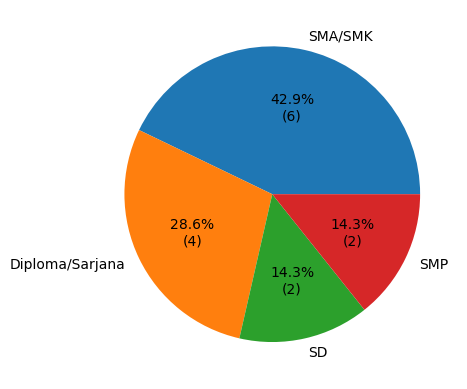

In [14]:
s = dfE.TP.value_counts()
p = plt.pie(s, labels = s.index, autopct=autopct_format(s))
plt.show()

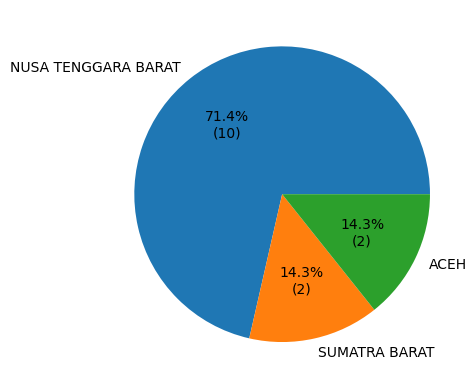

In [15]:
s = dfE.PLU.value_counts()
p = plt.pie(s, labels = s.index, autopct=autopct_format(s))
plt.show()

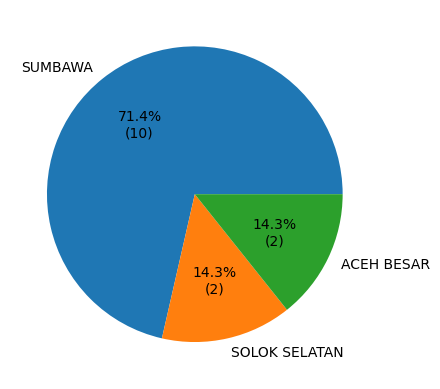

In [16]:
s = dfE.KLU.value_counts()
p = plt.pie(s, labels = s.index, autopct=autopct_format(s))
plt.show()

<Figure size 1200x800 with 0 Axes>

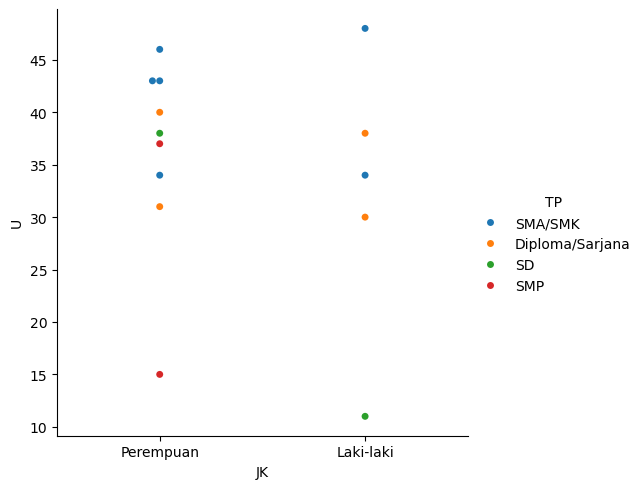

In [7]:
plt.figure(figsize=(12,8))
sns.catplot(x="JK", y="U", hue="TP", kind="swarm", data=dfE)
plt.show()

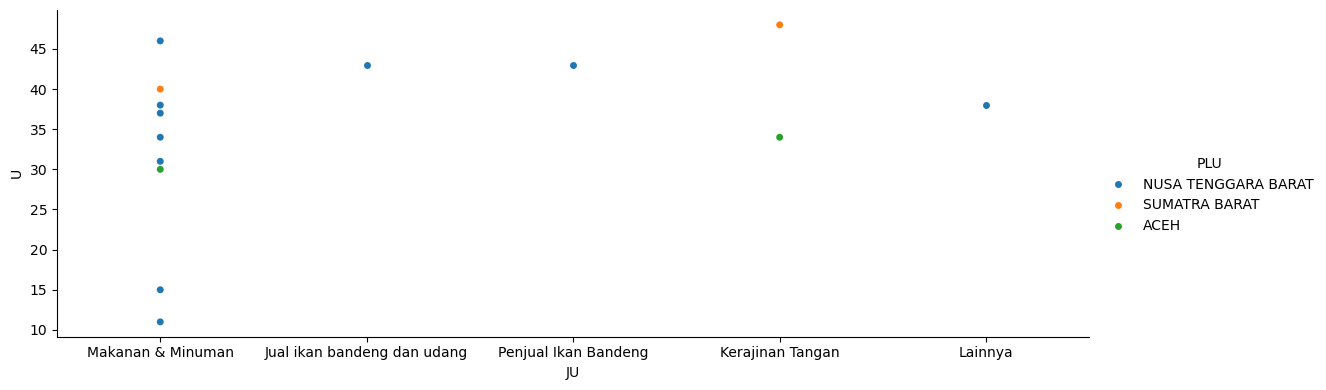

In [8]:
sns.catplot(x="JU", y="U", hue="PLU", kind="swarm", data=dfE, height=4, aspect=2.8)
plt.show()

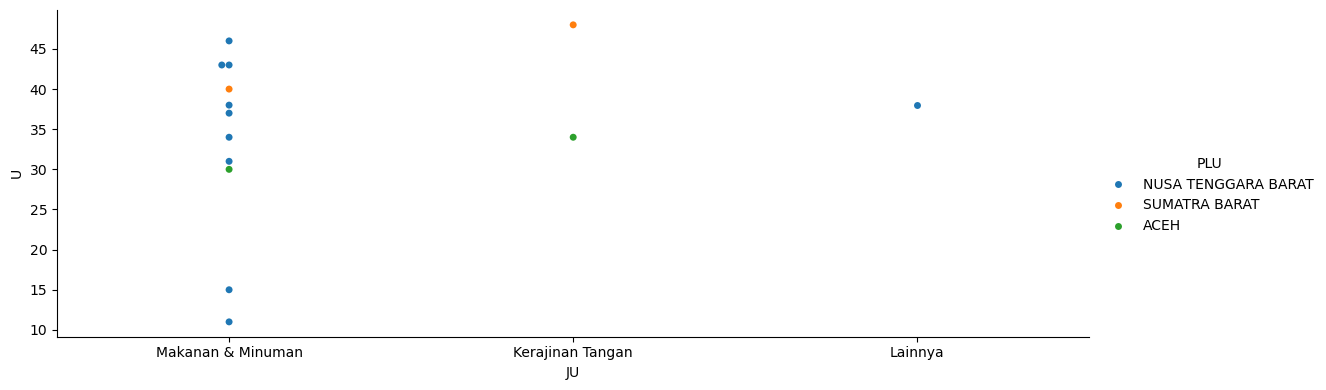

In [9]:
dfE.loc[(dfE['JU'] == 'Jual ikan bandeng dan udang'), "JU"] = "Makanan & Minuman"
dfE.loc[(dfE['JU'] == 'Penjual Ikan Bandeng'), "JU"] = "Makanan & Minuman"
sns.catplot(x="JU", y="U", hue="PLU", kind="swarm", data=dfE, height=4, aspect=2.8)
plt.show()

## Kesan E.01:

* Umur di instrumen ini numerik, di instrumen lain kategorik (selang interval)
    * penulisan umur ada inkonsistensi di data, ada yang menulis "15 tahun" dan ada yang cuma angka "15". Saya perbaiki langsung di data.
* Data imbalance ke Sumbawa - NTB
* Terdapat noise di data : Rohit firmansyah	11 tahun	Laki-laki	SD	Makanan & Minuman
* Nilai "Jual Ikan bandeng dan Udang" dan "Penjual ikan Bandeng" seharusnya "Makanan dan Minuman"
* "Jenis UMKM" juga ada yg isi "Lainnya" dan bukan informasi yang sebenarnya.
* Secara umum paling banyak responden "wanita" berumur ">30 tahun" menggunakan fasilitas bakti untuk UMKM jenis "Makanan & Minuman".
* Presentase Tingkat pendidikan responden meningkat seiring dengan dengan level pendidikannya; SD paling rendah, ..., SMA paling tinggi. Namun tidak cukup sampel untuk menarik kesimpulan dari pola ini.

# E2: Pengguna Fasilitas BAKTI, Kulaitas Koneksi, dan Penggunaan.

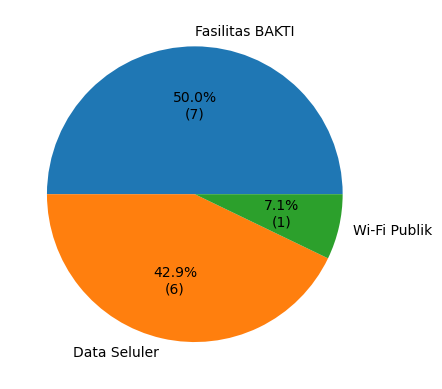

In [17]:
# 'Dari mana Anda mendapatkan akses internet?': 'DmAmai',
s = dfE.DmAmai.value_counts()
p = plt.pie(s, labels = s.index, autopct=autopct_format(s))
plt.show()

In [41]:
dfE2 = dfE[dfE["DmAmai"]=="Fasilitas BAKTI"]
dfE3 = dfE[dfE["DmAmai"]!="Fasilitas BAKTI"]
print(dfE2.shape)
dfE2.sample()

(7, 40)


,U,JK,TP,JU,PLU,KLU,Aappe,PyAgumi,DmAmai,KaidlA,...,Mpllde,Mjp,AAmaapbumpusys,Aimeous,Aimsmpp,Aimipysh,AkuAdmiukUsys,AApmpdmae,AAmmplltpiuU,AkimAumpb
6,34,Laki-laki,SMA/SMK,Kerajinan Tangan,ACEH,ACEH BESAR,Ya,Smartphone,Fasilitas BAKTI,Tidak stabil,...,2,2,"Marketplace untuk penjualan (e.g., Shopee, Tok...",2,2,2,Koneksi internet yang tidak stabil,Tidak,Ya,Ya


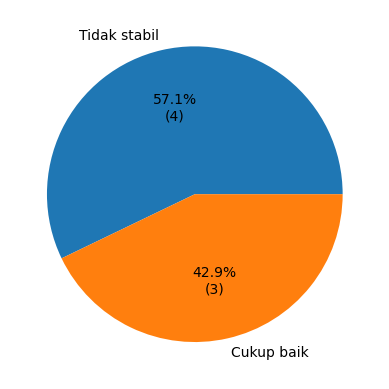

In [62]:
#  'Kualitas akses internet di lokasi Anda': 'KaidlA', ==> Hanya BAKTI
s = dfE2.KaidlA.value_counts()
p = plt.pie(s, labels = s.index, autopct=autopct_format(s))
plt.show()

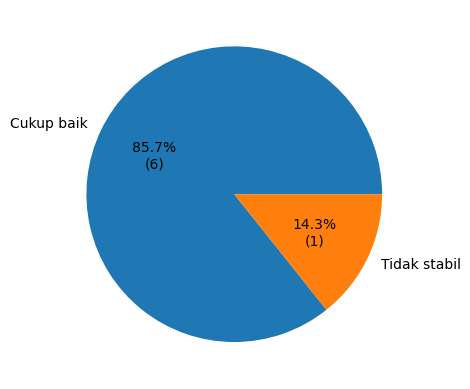

In [43]:
#  'Kualitas akses internet di lokasi Anda': 'KaidlA', ==> Selain BAKTI
s = dfE3.KaidlA.value_counts()
p = plt.pie(s, labels = s.index, autopct=autopct_format(s))
plt.show()

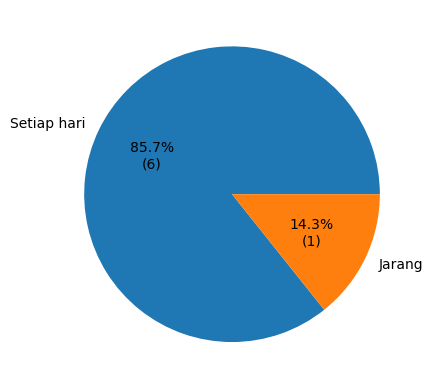

In [44]:
# 'Seberapa sering Anda menggunakan internet untuk kegiatan UMKM?': 'SsAmiukU', ==> Hanya BAKTI
s = dfE2.SsAmiukU.value_counts()
p = plt.pie(s, labels = s.index, autopct=autopct_format(s))
plt.show()

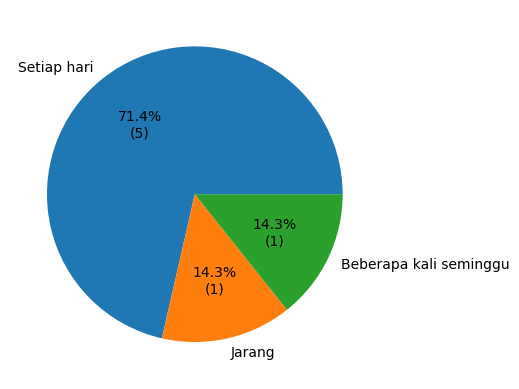

In [45]:
# 'Seberapa sering Anda menggunakan internet untuk kegiatan UMKM?': 'SsAmiukU', ==> Selain BAKTI
#  'Kualitas akses internet di lokasi Anda': 'KaidlA', ==> Selain BAKTI
s = dfE3.SsAmiukU.value_counts()
p = plt.pie(s, labels = s.index, autopct=autopct_format(s))
plt.show()

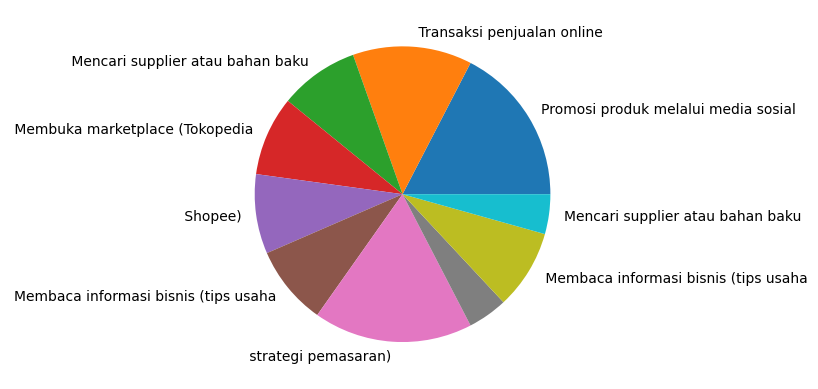

Counter({'Promosi produk melalui media sosial': 4, ' strategi pemasaran)': 4, ' Transaksi penjualan online': 3, ' Mencari supplier atau bahan baku': 2, ' Membuka marketplace (Tokopedia': 2, ' Shopee)': 2, 'Membaca informasi bisnis (tips usaha': 2, ' Membaca informasi bisnis (tips usaha': 2, ' ': 1, 'Mencari supplier atau bahan baku': 1})


In [113]:
# Untuk tujuan apa Anda menggunakan internet dalam kegiatan UMKM? (Pilih semua yang sesuai)': 'UtaAmidkUsys', ==> Hanya BAKTI
ss = dfE2.UtaAmidkUsys
S = []
for s in ss:
    S.extend(s.replace("e.g., ", "").split(","))
s = Counter(S)
plt.pie(s.values(), labels=s.keys())
plt.show()
print(s)
dSum = sum(s.values())

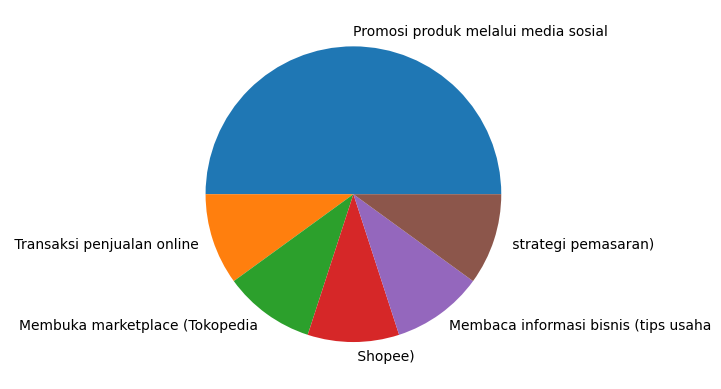

Counter({'Promosi produk melalui media sosial': 5, ' Transaksi penjualan online': 1, 'Membuka marketplace (Tokopedia': 1, ' Shopee)': 1, 'Membaca informasi bisnis (tips usaha': 1, ' strategi pemasaran)': 1})


In [114]:
# Untuk tujuan apa Anda menggunakan internet dalam kegiatan UMKM? (Pilih semua yang sesuai)': 'UtaAmidkUsys', ==> Hanya BAKTI
ss = dfE3.UtaAmidkUsys
S = []
for s in ss:
    S.extend(s.replace("e.g., ", "").split(","))
s = Counter(S)
plt.pie(s.values(), labels=s.keys())
plt.show()
print(s)
dSum = sum(s.values())

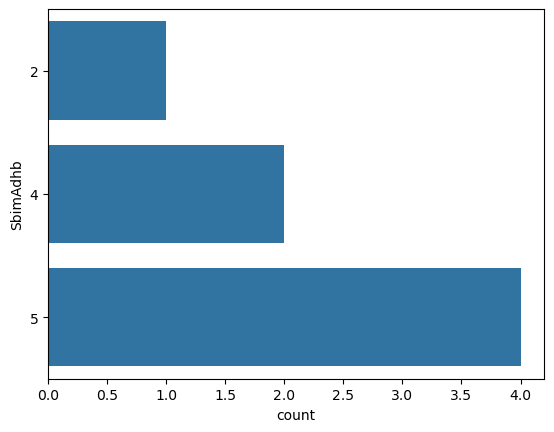

In [48]:
#  'Seberapa besar internet membantu Anda dalam hal berikut?': 'SbimAdhb', ==> Hanya Bakti
ax = sns.countplot(y='SbimAdhb', data=dfE2)

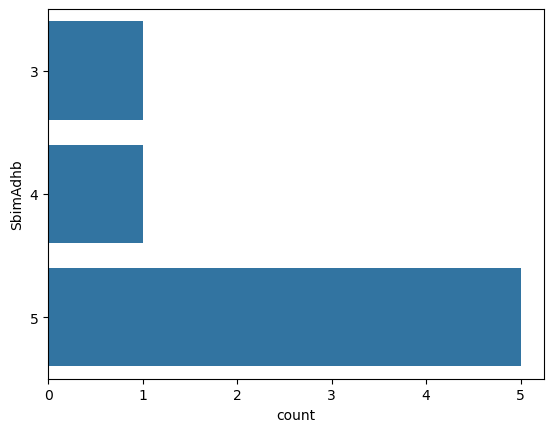

In [49]:
#  'Seberapa besar internet membantu Anda dalam hal berikut?': 'SbimAdhb', ==> Hanya Bakti
ax = sns.countplot(y='SbimAdhb', data=dfE3)

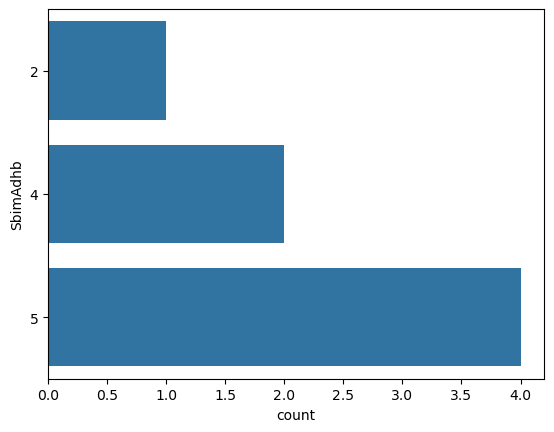

In [50]:
#  'Memperluas pasar (mencapai pelanggan di luar wilayah):': 'Mppdlw',==> Hanya Bakti
ax = sns.countplot(y='SbimAdhb', data=dfE2)

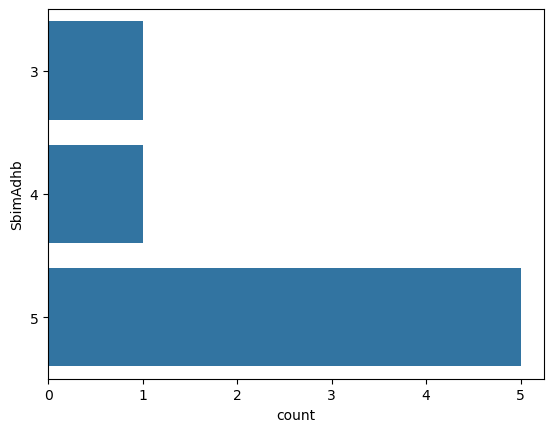

In [51]:
#  'Memperluas pasar (mencapai pelanggan di luar wilayah):': 'Mppdlw',==> Selain Bakti
ax = sns.countplot(y='SbimAdhb', data=dfE3)

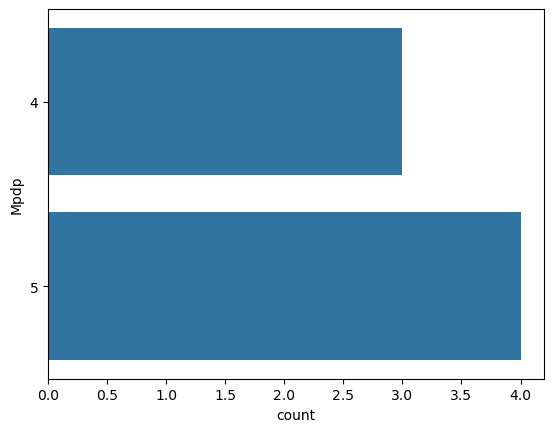

In [52]:
# 'Meningkatkan penjualan dan pendapatan: ': 'Mpdp' ==> hanya Bakti
ax = sns.countplot(y='Mpdp', data=dfE2)

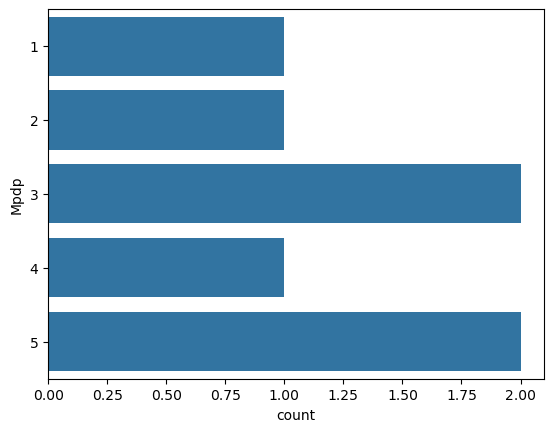

In [53]:
# 'Meningkatkan penjualan dan pendapatan: ': 'Mpdp' ==> Selain Bakti
ax = sns.countplot(y='Mpdp', data=dfE3)

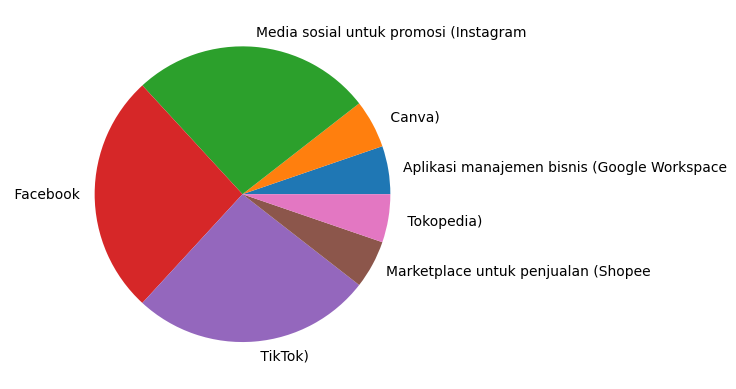

Counter({'Media sosial untuk promosi (Instagram': 5, ' Facebook': 5, ' TikTok)': 5, 'Aplikasi manajemen bisnis (Google Workspace': 1, ' Canva)': 1, 'Marketplace untuk penjualan (Shopee': 1, ' Tokopedia)': 1})


In [115]:
# 'Apakah Anda menggunakan aplikasi atau platform berikut untuk meningkatkan produktivitas usaha? (Pilih semua yang sesuai)': 'AAmaapbumpusys',
# Hanya BAKTI
ss = dfE2.AAmaapbumpusys
S = []
for s in ss:
    S.extend(s.replace("e.g., ", "").split(","))
s = Counter(S)
plt.pie(s.values(), labels=s.keys())
plt.show()
print(s)
dSum = sum(s.values())

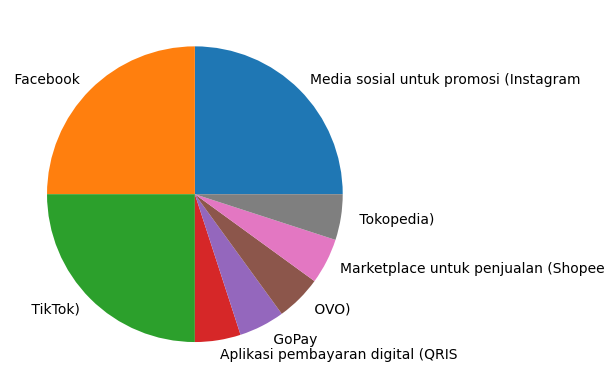

Counter({'Media sosial untuk promosi (Instagram': 5, ' Facebook': 5, ' TikTok)': 5, 'Aplikasi pembayaran digital (QRIS': 1, ' GoPay': 1, ' OVO)': 1, 'Marketplace untuk penjualan (Shopee': 1, ' Tokopedia)': 1})


In [116]:
# 'Apakah Anda menggunakan aplikasi atau platform berikut untuk meningkatkan produktivitas usaha? (Pilih semua yang sesuai)': 'AAmaapbumpusys',
# Selain BAKTI
ss = dfE3.AAmaapbumpusys
S = []
for s in ss:
    S.extend(s.replace("e.g., ", "").split(","))
s = Counter(S)
plt.pie(s.values(), labels=s.keys())
plt.show()
print(s)
dSum = sum(s.values())

## Kesan E.02:

* 50% responden menggunakan fasilitas Bakti.
* Dibandingkan koneksi BAKTI koneksi lainnya secara signifikan lebih baik.
* Respondedn pengguna Bakti tersebut >50% masih merasakan internet yang tidak stabil.
* Koneksi Bakti digunakan hampir setiap hari oleh hampir semua responden bakti
* Koneksi tersebut digunakan untuk berbagai tujuan, menariknya di koneksi selain BAKTI kebanyakan tujuan di dominasi untuk promosi produk.
* Koneksi BAKTI secara signifikan meningkatkan penjualan dan pendapatan dibandingkan koneksi non-BAKTI.
* Penggunaan jenis koneksi tidak mempengaruhi media / platform yang digunakan, tapi menariknya koneksi BAKTI tidak digunakan untuk pembayaran digital seperti OVO, Gopay, atau QRIS.

# E3. Tantangan dan Peluang

* 'Apa kendala utama Anda dalam memanfaatkan internet untuk kegiatan UMKM? (Pilih semua yang sesuai)': 'AkuAdmiukUsys',
* 'Apakah Anda pernah mengikuti pelatihan digital marketing atau e-commerce?': 'AApmpdmae',
* 'Apakah Anda merasa memerlukan pelatihan lebih lanjut tentang penggunaan internet untuk UMKM?': 'AAmmplltpiuU',
* 'Apakah keberadaan internet memotivasi Anda untuk mengembangkan produk/jasa baru?': 'AkimAumpb'}

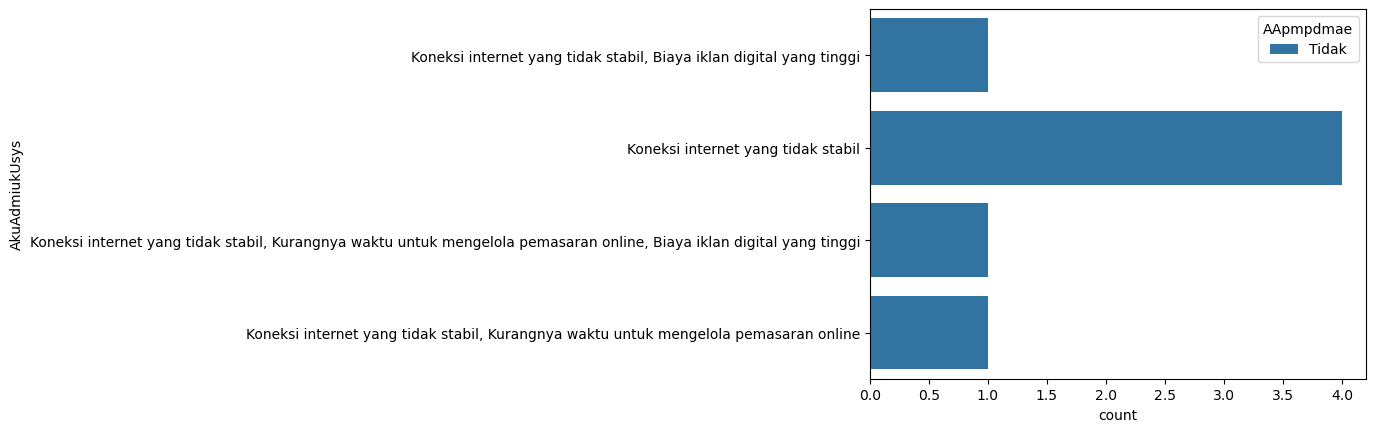

In [57]:
# Hanya BAKTI
ax = sns.countplot(y = 'AkuAdmiukUsys', hue = 'AApmpdmae', data=dfE2)

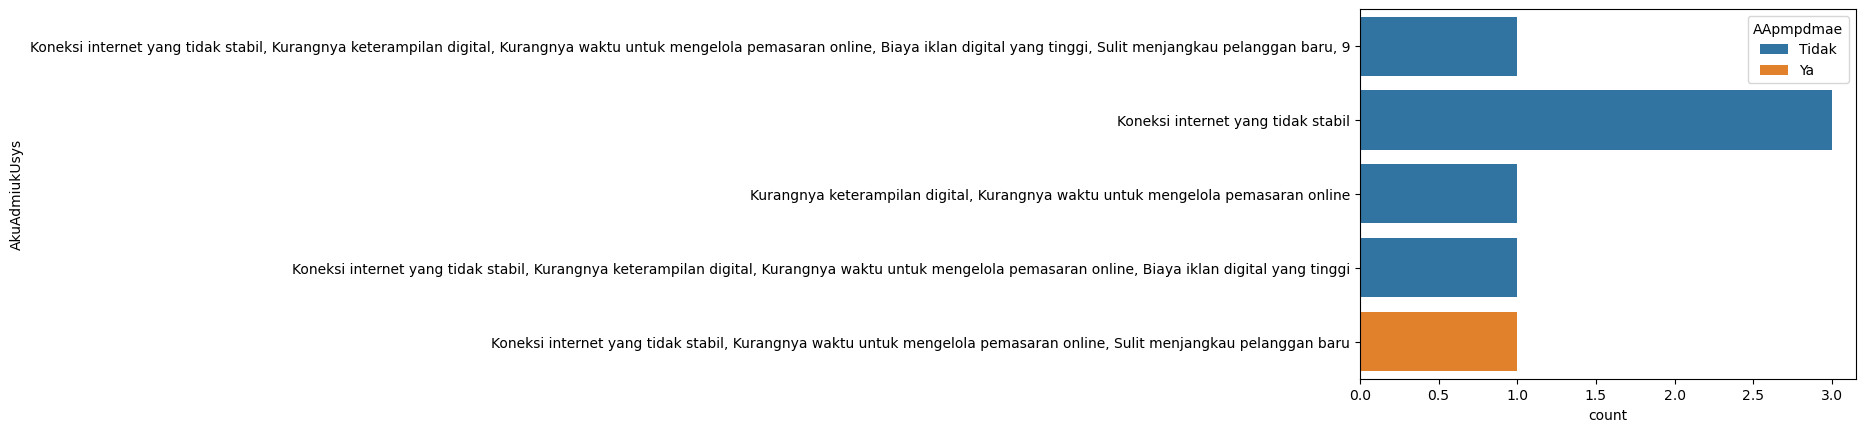

In [58]:
# Selain BAKTI
ax = sns.countplot(y = 'AkuAdmiukUsys', hue = 'AApmpdmae', data=dfE3)

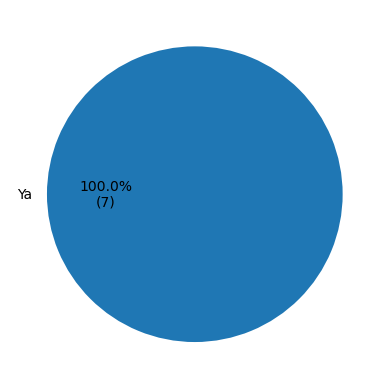

In [63]:
#  'Apakah keberadaan internet memotivasi Anda untuk mengembangkan produk/jasa baru?': 'AkimAumpb'}
# Hanya BAKTI
s = dfE2.AkimAumpb.value_counts()
p = plt.pie(s, labels = s.index, autopct=autopct_format(s))
plt.show()

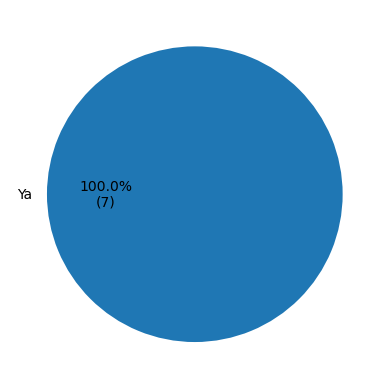

In [64]:
#  'Apakah keberadaan internet memotivasi Anda untuk mengembangkan produk/jasa baru?': 'AkimAumpb'}
# Selain BAKTI
s = dfE2.AkimAumpb.value_counts()
p = plt.pie(s, labels = s.index, autopct=autopct_format(s))
plt.show()

# Kesan E3:

* Hampir seluruh responden belum pernah mendapatkan digital marketing maupun eCommerce.
* Baik koneksi Bakti maupun non-Bakti menurut responden kualitas internet yang paling menghambat mereka dalam menggunakan internet untuk kegiatan Ekonomi/Bisnis.
* Semua responden setuju koneksi internet yang baik akan meningkatkan motivasi mereka mngembangkan produk atau jasa baru.

# <center><font color="blue">INSTRUMEN PENGUKUR DAMPAK INTERNET TERHADAP SOSIAL</font></center>

* Data https://docs.google.com/spreadsheets/d/1vg-XT0Utp9ZXosI3Y0zbJPSHajJLGh4m1cXSWyQ-Ogw/edit?usp=sharing

In [74]:
newColsS

{'Timestamp': 'T',
 'Nama': 'N',
 'Umur': 'U',
 'Jenis Kelamin': 'JK',
 'Tingkat Pendidikan': 'TP',
 'Pekerjaan Utama': 'PU',
 'Provinsi Tempat Tinggal': 'PTT',
 'Kabupaten/Kota Tempat Tinggal': 'KTT',
 'Apakah anda punya perangkat elektronik ?': 'Aappe',
 'Perangkat yang Anda gunakan untuk mengakses internet': 'PyAgumi',
 'Dari mana Anda mendapatkan akses internet ?': 'DmAmai',
 'Kualitas akses internet di lokasi Anda:': 'KaidlA',
 'Seberapa sering Anda menggunakan internet?': 'SsAmi',
 'Apa tujuan utama Anda menggunakan internet?\n( Pilih semua yang sesuai )': 'AtuAmiPsys',
 'Menggunakan perangkat digital secara efektif:': 'Mpdse',
 'Mencari informasi secara online:': 'Miso',
 'Membuat konten digital (video, tulisan, gambar):': 'Mkdtg',
 'Berkomunikasi melalui platform digital (email, media sosial):': 'Bmpdms',
 'Menganalisis keabsahan informasi di internet:': 'Mkidi',
 'Menggunakan layanan pemerintah atau publik berbasis digital: ': 'Mlpapbd',
 'Apakah akses internet telah meningkat

# S1: Statistika Dasar & Keterwakilan Elemen Populasi

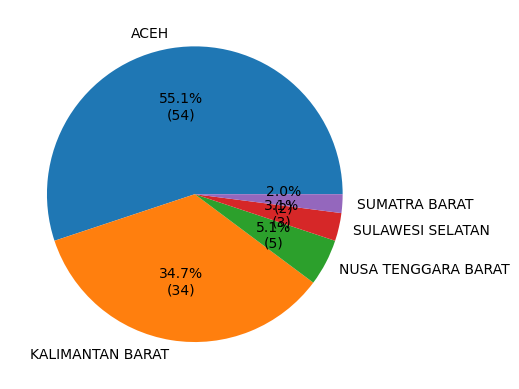

In [83]:
# ''Provinsi Tempat Tinggal': 'PTT',
s = dfS.PTT.value_counts()
p = plt.pie(s, labels = s.index, autopct=autopct_format(s))
plt.show()

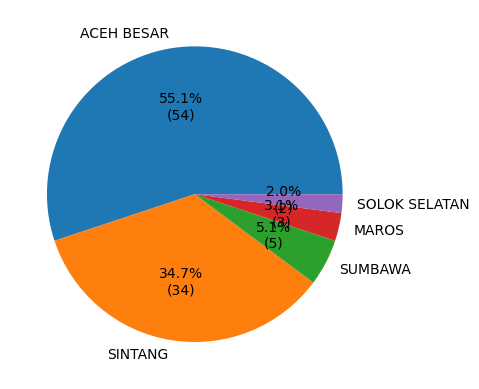

In [84]:
# ''Kabupaten/Kota Tempat Tinggal': 'KTT',
s = dfS.KTT.value_counts()
p = plt.pie(s, labels = s.index, autopct=autopct_format(s))
plt.show()

In [75]:
dfS.describe(include="all")

,U,JK,TP,PU,PTT,KTT,Aappe,PyAgumi,DmAmai,KaidlA,...,MsId,Sbokd,Baap,Srpai,FdoKd,AaitmAbidoltk,AaimimpAdksak,Mpatdlc,Bpdafo,Mptislkp
count,98,98,98,98,98,98,98,98,98,98,...,98.000000,98.000000,98.000000,98.000000,98.000000,98,98,98.000000,98.000000,98.000000
unique,42,2,5,30,5,5,2,7,11,4,...,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN
top,34,Laki-laki,SMA/SMK,Wirausaha,ACEH,ACEH BESAR,Ya,Smartphone,Data Seluler,Cukup baik,...,NaN,NaN,NaN,NaN,NaN,"Ya, sangat membantu",Ya,NaN,NaN,NaN
freq,8,58,46,20,54,54,97,90,60,51,...,NaN,NaN,NaN,NaN,NaN,81,94,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.683673,3.877551,3.448980,4.204082,3.581633,NaN,NaN,4.336735,4.204082,4.336735
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.011245,0.922405,1.104092,0.836773,1.054431,NaN,NaN,0.951871,0.962805,0.836585
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,2.000000,1.000000,NaN,NaN,1.000000,1.000000,2.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,3.000000,3.000000,4.000000,3.000000,NaN,NaN,4.000000,4.000000,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,4.000000,3.000000,4.000000,3.000000,NaN,NaN,5.000000,5.000000,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000000,5.000000,4.000000,5.000000,4.000000,NaN,NaN,5.000000,5.000000,5.000000


In [76]:
dfS2 = dfS[dfS["DmAmai"]=="Fasilitas BAKTI"]
dfS3 = dfS[dfS["DmAmai"]!="Fasilitas BAKTI"]

In [77]:
# Hanya BAKTI
dfS2.describe(include="all")

,U,JK,TP,PU,PTT,KTT,Aappe,PyAgumi,DmAmai,KaidlA,...,MsId,Sbokd,Baap,Srpai,FdoKd,AaitmAbidoltk,AaimimpAdksak,Mpatdlc,Bpdafo,Mptislkp
count,24,24,24,24,24,24,24,24,24,24,...,24.000000,24.000000,24.000000,24.000000,24.000000,24,24,24.000000,24.000000,24.000000
unique,19,2,2,11,4,4,1,2,1,4,...,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN
top,24,Laki-laki,Diploma/Sarjana,Pegawai Negeri,ACEH,ACEH BESAR,Ya,Smartphone,Fasilitas BAKTI,Tidak stabil,...,NaN,NaN,NaN,NaN,NaN,"Ya, sangat membantu",Ya,NaN,NaN,NaN
freq,3,15,13,5,12,12,24,23,24,10,...,NaN,NaN,NaN,NaN,NaN,23,22,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.916667,4.000000,3.375000,4.250000,3.708333,NaN,NaN,4.500000,4.375000,4.375000
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.928611,0.884652,1.013496,0.793999,0.907896,NaN,NaN,0.722315,0.824226,0.710939
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.000000,2.000000,2.000000,2.000000,2.000000,NaN,NaN,3.000000,2.000000,3.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,3.000000,3.000000,4.000000,3.000000,NaN,NaN,4.000000,4.000000,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,4.000000,3.000000,4.000000,3.500000,NaN,NaN,5.000000,5.000000,4.500000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.000000,5.000000,4.000000,5.000000,4.250000,NaN,NaN,5.000000,5.000000,5.000000


In [78]:
# Selain BAKTI
dfS3.describe(include="all")

,U,JK,TP,PU,PTT,KTT,Aappe,PyAgumi,DmAmai,KaidlA,...,MsId,Sbokd,Baap,Srpai,FdoKd,AaitmAbidoltk,AaimimpAdksak,Mpatdlc,Bpdafo,Mptislkp
count,74,74,74,74,74,74,74,74,74,74,...,74.000000,74.000000,74.000000,74.000000,74.000000,74,74,74.000000,74.000000,74.000000
unique,35,2,5,25,5,5,2,7,10,4,...,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,NaN
top,22,Laki-laki,SMA/SMK,Wirausaha,ACEH,ACEH BESAR,Ya,Smartphone,Data Seluler,Cukup baik,...,NaN,NaN,NaN,NaN,NaN,"Ya, sangat membantu",Ya,NaN,NaN,NaN
freq,7,43,35,19,42,42,73,67,60,43,...,NaN,NaN,NaN,NaN,NaN,58,72,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.608108,3.837838,3.472973,4.189189,3.540541,NaN,NaN,4.283784,4.148649,4.324324
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.031259,0.936725,1.137445,0.854892,1.100301,NaN,NaN,1.013880,1.002496,0.877545
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.000000,1.000000,1.000000,2.000000,1.000000,NaN,NaN,1.000000,1.000000,2.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,3.000000,3.000000,4.000000,3.000000,NaN,NaN,4.000000,3.000000,4.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,4.000000,3.000000,4.000000,3.000000,NaN,NaN,5.000000,4.500000,5.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,5.000000,4.750000,5.000000,4.000000,NaN,NaN,5.000000,5.000000,5.000000


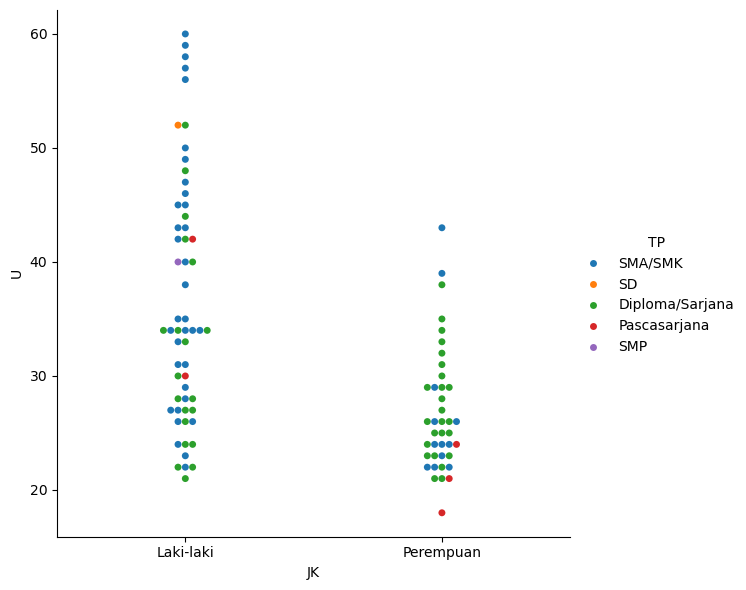

In [89]:
dfS = dfS.sort_values(by=['U'], ascending=False)
sns.catplot(x="JK", y="U", hue="TP", kind="swarm", data=dfS, height=6, aspect=1.0)
plt.show()

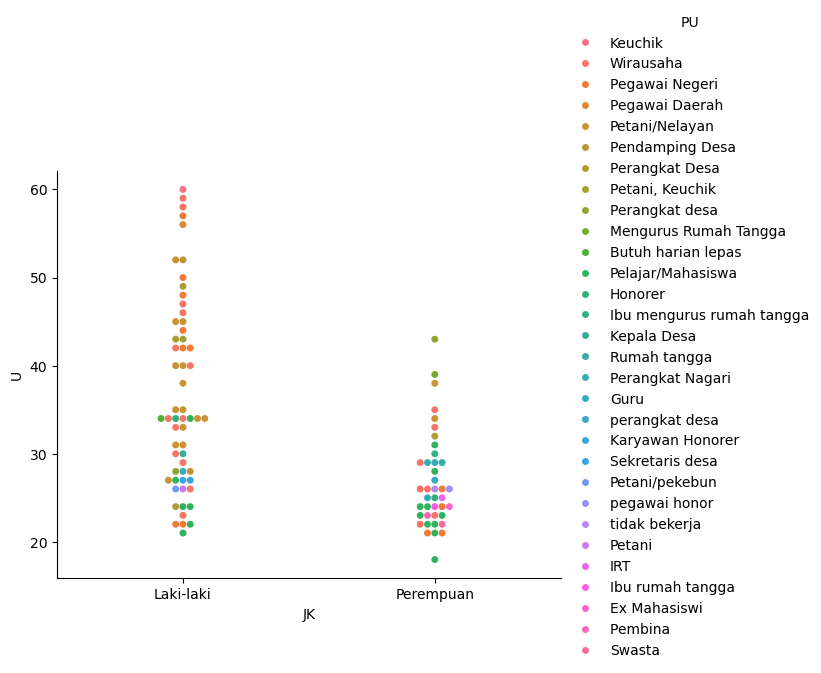

In [91]:
dfS = dfS.sort_values(by=['U'], ascending=False)
sns.catplot(x="JK", y="U", hue="PU", kind="swarm", data=dfS, height=6, aspect=1.0)
plt.show()

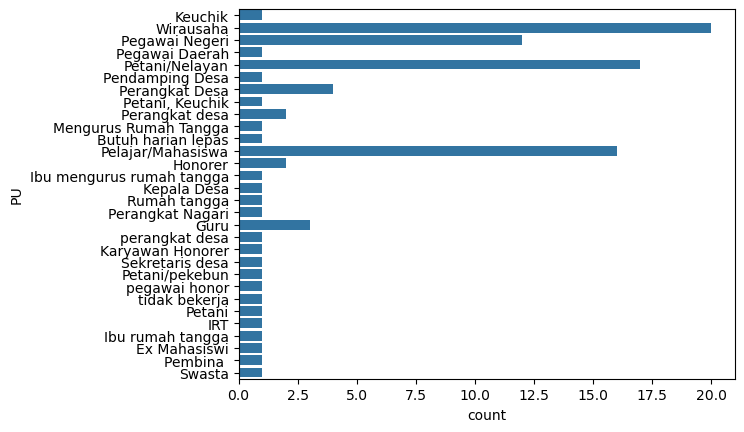

In [92]:
ax = sns.countplot(y = 'PU', data=dfS)

## Kesan S.01:

* Umur di instrumen ini numerik, di instrumen lain kategorik (selang interval)
    * penulisan umur ada inkonsistensi di data, ada yang menulis "15 tahun" dan ada yang cuma angka "15". Saya perbaiki langsung di data.
* Data di dominasi responden dari Aceh besar
* Responden didominasi oleh responden dengan tingkat pendidikan Diploma/Sarjana dan SMA/SMK
* jumlah Kategori "Pekerjaan Utama" terlalu banyak.
  

# S2: PENGUNAAN INTERNET

In [95]:
#'Apakah anda punya perangkat elektronik ?': 'Aappe',
# 'Perangkat yang Anda gunakan untuk mengakses internet': 'PyAgumi',
# 'Dari mana Anda mendapatkan akses internet ?': 'DmAmai',

#p = mosaic(dfS, ['Aappe', 'PyAgumi', 'DmAmai'])
pd.crosstab(dfS.Aappe, dfS.PyAgumi, dfS.DmAmai, aggfunc=pd.Series.nunique)

PyAgumi,"Hp , laptop","Hp, laptop, TV",Laptop/PC,Smartphone,Smartphone dan Laptop,"Smartphone, laptop",Tablet
Aappe,,,,,,,
Tidak,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Ya,1.0,1.0,2.0,8.0,1.0,1.0,1.0


In [96]:
pd.crosstab(dfS.PyAgumi, dfS.DmAmai)

DmAmai,Bakti dan Data seluler,Bakti.data seluler.,Data Seluler,Data seluler dan bakti,Fasilitas BAKTI,Indihome,Wi-Fi,Wi-Fi Publik,"Wifi , seluler",Wifi dirumah,"Wifi,selular"
PyAgumi,,,,,,,,,,,
"Hp , laptop",0,0,0,0,0,0,0,0,1,0,0
"Hp, laptop, TV",0,0,1,0,0,0,0,0,0,0,0
Laptop/PC,0,0,0,0,1,0,0,2,0,0,0
Smartphone,0,1,58,1,23,0,1,4,0,1,1
Smartphone dan Laptop,1,0,0,0,0,0,0,0,0,0,0
"Smartphone, laptop",0,0,0,0,0,1,0,0,0,0,0
Tablet,0,0,1,0,0,0,0,0,0,0,0


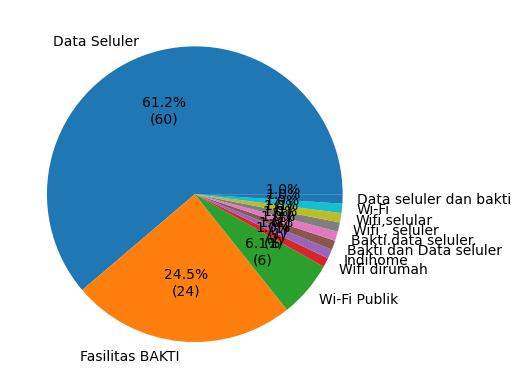

In [100]:
# 'Dari mana Anda mendapatkan akses internet ?': 'DmAmai',
# 'Kualitas akses internet di lokasi Anda:': 'KaidlA',
# 'Seberapa sering Anda menggunakan internet?': 'SsAmi',
# 'Apa tujuan utama Anda menggunakan internet?\n( Pilih semua yang sesuai )': 'AtuAmiPsys',

#pd.crosstab(dfS.DmAmai, dfS.AtuAmiPsys)
#ax = sns.countplot(y = 'AtuAmiPsys', hue = 'DmAmai', data=dfS)
s = dfS.DmAmai.value_counts()
p = plt.pie(s, labels = s.index, autopct=autopct_format(s))
plt.show()

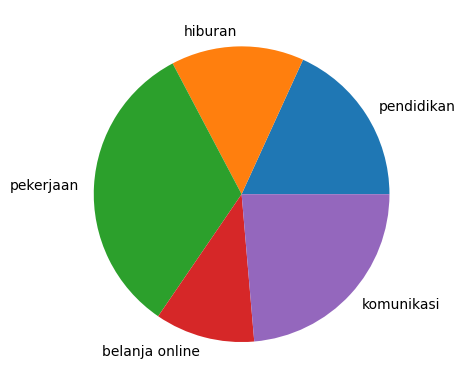

Counter({'pekerjaan': 18, 'komunikasi': 13, 'pendidikan': 10, 'hiburan': 8, 'belanja online': 6})
Hiburan = 14.545454545454545% dari seluruh 55 total data


In [108]:
#  'Apa tujuan utama Anda menggunakan internet?\n( Pilih semua yang sesuai )': 'AtuAmiPsys',
# Hanya BAKTI
ss = dfS2.AtuAmiPsys
S = []
for s in ss:
    sTmp = [t.lower().strip() for t in s.replace("e.g., ", "").split(",")]
    S.extend(sTmp)
s = Counter(S)
plt.pie(s.values(), labels=s.keys())
plt.show()
print(s)
dSum = sum(s.values())
print("Hiburan = {}% dari seluruh {} total data".format(s["hiburan"]*100/dSum, dSum))

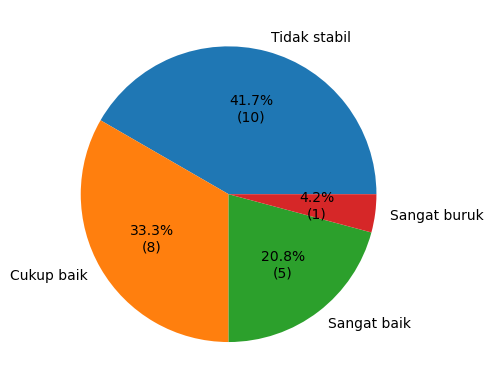

In [109]:
# Kualitas internet BAKTI
#  'Kualitas akses internet di lokasi Anda': 'KaidlA', ==> Hanya BAKTI
s = dfS2.KaidlA.value_counts()
p = plt.pie(s, labels = s.index, autopct=autopct_format(s))
plt.show()

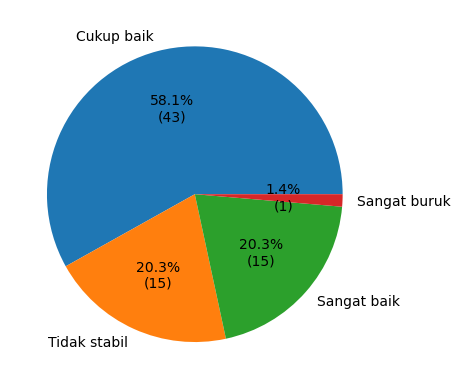

In [110]:
# Kualitas internet BAKTI
#  'Kualitas akses internet di lokasi Anda': 'KaidlA', ==> Selain BAKTI
s = dfS3.KaidlA.value_counts()
p = plt.pie(s, labels = s.index, autopct=autopct_format(s))
plt.show()

# Kesan S2: PENGUNAAN INTERNET¶

* Kebanyakan pengguna mengakses via smartPhone
* Hanya 24.5% responden menggunakan fasilitas Bakti
* Dari pengguna internet bakti hanya 14.5% yang menggunakan untuk hiburan.
* Koneksi BAKTi sedikit lebih buruk ketimbang koneksi selain BAKTI.

# Kesan S3: DAMPAK AKSES INTERNET PADA LITERASI DIGITAL

* Analisa section ini graphnya bisa mengambil dari Google Form. Saya tidak melihat hubungan multivariat yang berarti atau hasil yang tidak trivial.

# Kesan S4: DAMPAK SOSIAL DARI LITERASI DIGITAL

* Analisa section ini graphnya bisa mengambil dari Google Form. Saya tidak melihat hubungan multivariat yang berarti atau hasil yang tidak trivial.
* Secara umum hampir seluruh responden menggunakan koneksi internet untuk berbagai bidang yang ditanyakan.

# Dari poin ini saya hanya laporkan adanya pola menarik di data ya

* Karena saya melihat terlalu banyak hasil trivial

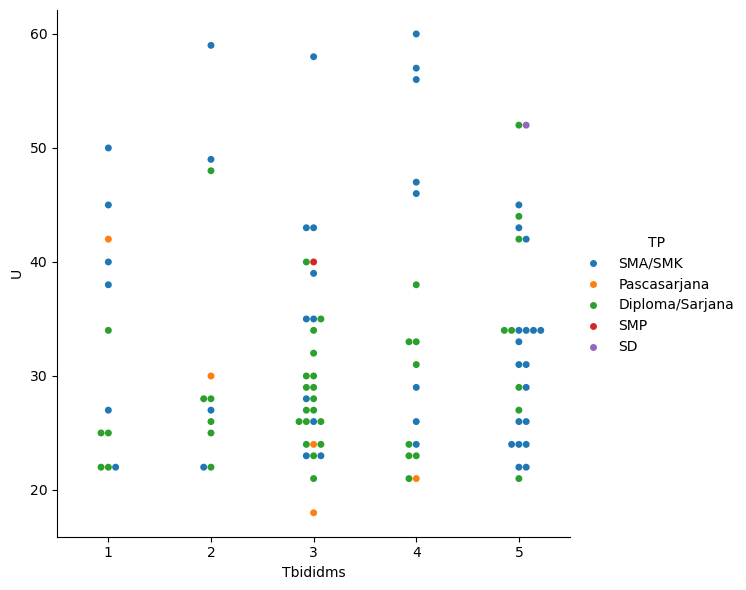

In [117]:
# Terlalu banyak informasi di internet dapat membingungkan saya': 'Tbididms',
#  'Tingkat Pendidikan': 'TP',
# 'Umur': 'U',
dfS = dfS.sort_values(by=['U'], ascending=False)
sns.catplot(x="Tbididms", y="U", hue="TP", kind="swarm", data=dfS, height=6, aspect=1.0)
plt.show()

# Kesan Grafik diatas:

## Literasi Digital yang rendah nampak di semua jenjang umur dan semua level pendidikan

# <center><font color="blue">INSTRUMEN PENGUKUR DAMPAK INTERNET TERHADAP KESEHATAN</font></center>

* Data https://docs.google.com/spreadsheets/d/1v3ORA_6EjcK6YR-lEkYSVBMiYvTZ49zemqP3BPxMcW8/edit?gid=433508190#gid=433508190

In [120]:
newColsK

{'Timestamp': 'T',
 'Nama': 'N',
 'Jenis Kelamin': 'JK',
 'Usia': 'U',
 'Provinsi Tempat Tinggal': 'PTT',
 'Kabupaten/Kota Tempat Tinggal': 'KTT',
 'Desa/Kecamatan Tempat Tinggal': 'DTT',
 'Apakah Anda memiliki akses internet di rumah?': 'AAmaidr',
 'Apakah Anda pernah menggunakan internet untuk mendapatkan layanan kesehatan?': 'AApmiumlk',
 'Jika ya, untuk tujuan apa Anda menggunakan internet terkait kesehatan? (Pilih semua yang sesuai)': 'JyutaAmitksys',
 'Sumber utama akses informasi kesehatan Anda melalui internet': 'SuaikAmi',
 'Apakah layanan kesehatan di wilayah Anda memanfaatkan internet untuk pelayanan?': 'AlkdwAmiup',
 'Mempermudah akses informasi kesehatan': 'Maik',
 'Menghemat waktu dalam mendapatkan layanan kesehatan': 'Mwdmlk',
 'Mempercepat proses administrasi (e.g., pendaftaran online)': 'Mpapo',
 'Meningkatkan kualitas konsultasi dengan dokter': 'Mkkdd',
 'Mempermudah akses ke layanan kesehatan jarak jauh (telemedicine)': 'Maklkjj',
 'Apakah internet meningkatkan kecep

# Profil Responden

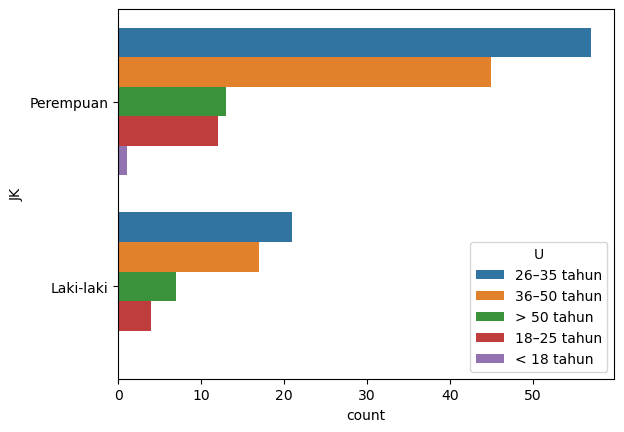

In [123]:
ax = sns.countplot( y='JK', hue = 'U', data=dfK)

# Akses internet

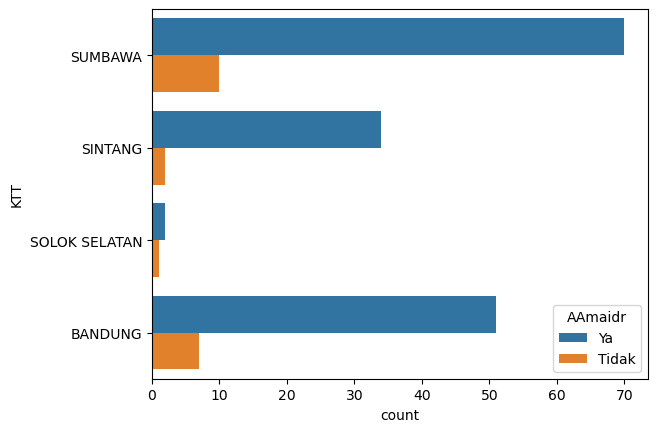

In [124]:
ax = sns.countplot( y='KTT', hue = 'AAmaidr', data=dfK)

# <center><font color="red">WARNING, tidak ada pertanyaan pakai koneksi Bakti/tidak di instrumen kesehatan</font></center>


## Sementara waktu saya stop analisa di instrumen ini.
## Untuk laporan bisa menggunakan informasi dari Google Form (variable selain yg sudah digunakan di chart diatas)

# <center><font color="blue">INSTRUMEN PENGUKUR DAMPAK INTERNET TERHADAP PENDIDIKAN (Guru atau Pengelola Sekolah)</font></center>

* https://docs.google.com/spreadsheets/d/1wSPRZ0OoApNLTHb4MtDHusvJqMJNB4NgIntt76Stklc/edit?gid=1677410986#gid=1677410986

In [126]:
newColsG

{'Timestamp': 'T',
 'Nama': 'N',
 'Jabatan di sekolah/lembaga pendidikan': 'Jdsp',
 'Jenjang pendidikan yang dikelola': 'Jpyd',
 'Provinsi sekolah atau lembaga pendidikan': 'Psalp',
 'Kabupaten/Kota sekolah atau lembaga pendidikan': 'Ksalp',
 'Apakah sekolah/lembaga Anda memiliki akses internet?': 'AsAmai',
 'Jika memiliki akses internet, darimana sumber internet tersebut?': 'Jmaidsit',
 'Seberapa sering Anda menggunakan internet untuk kegiatan pendidikan?': 'SsAmiukp',
 'Untuk tujuan apa Anda menggunakan internet di sekolah/lembaga pendidikan? (Pilih semua yang sesuai)': 'UtaAmidspsys',
 'Memudahkan akses ke materi pembelajaran': 'Makmp',
 'Menambah variasi metode pengajaran (e.g., video, aplikasi pembelajaran)': 'Mvmpvap',
 'Meningkatkan interaksi antara guru dan siswa': 'Miagds',
 'Memperluas wawasan siswa tentang informasi global': 'Mwstig',
 'Mendukung pembelajaran berbasis teknologi (e.g., e-learning, quiz online)': 'Mpbteqo',
 'Apakah internet membantu guru dalam meningkatkan ke

# Profil Responden

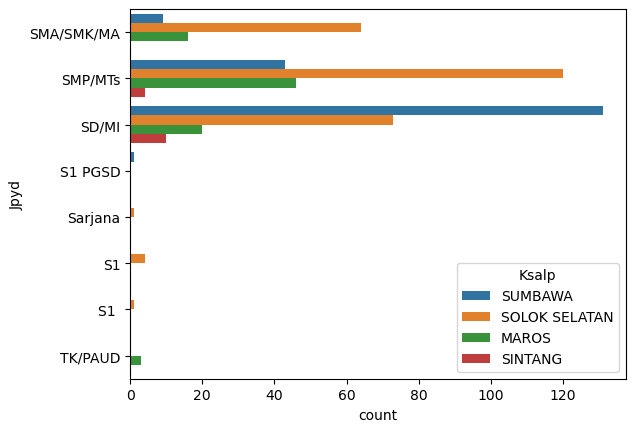

In [129]:
ax = sns.countplot( y='Jpyd', hue = 'Ksalp', data=dfG)

In [130]:
dfG2 = dfG[dfG["Jmaidsit"]=="Fasilitas pemerintah (e.g., BAKTI, layanan desa digital)"]
dfG3 = dfG[dfG["Jmaidsit"]!="Fasilitas pemerintah (e.g., BAKTI, layanan desa digital)"]

dfG2.shape, dfG3.shape

((288, 25), (258, 25))

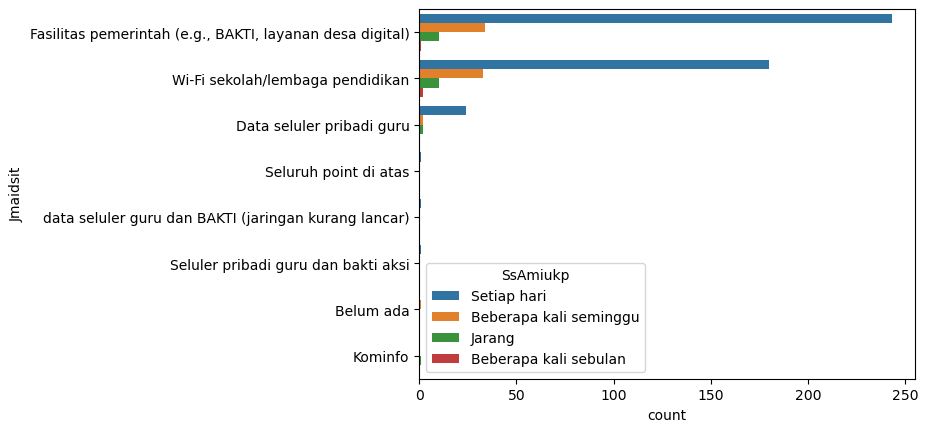

In [132]:
#  'Seberapa sering Anda menggunakan internet untuk kegiatan pendidikan?': 'SsAmiukp',
ax = sns.countplot( y='Jmaidsit', hue = 'SsAmiukp', data=dfG)

# Kesan: Trivial Guru mengoptimalkan penggunaan fasilitas yang ada ketimbang kuota pribadi

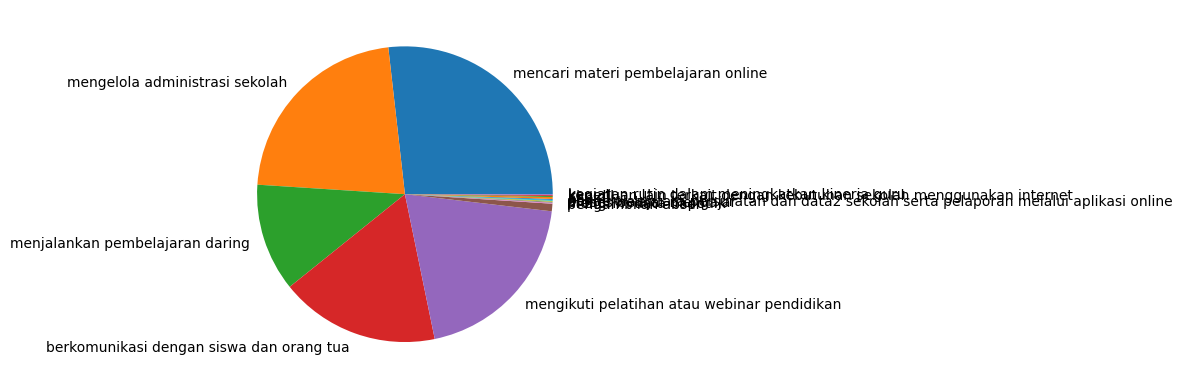

Counter({'mencari materi pembelajaran online': 261, 'mengelola administrasi sekolah': 216, 'mengikuti pelatihan atau webinar pendidikan': 194, 'berkomunikasi dengan siswa dan orang tua': 170, 'menjalankan pembelajaran daring': 115, '': 8, 'anbk': 2, 'pengambilan absen': 1, 'mengrim data dapodik': 1, 'proses belajar mengajar': 1, 'pengelolaan tata persuratan dan data2 sekolah serta pelaporan melalui aplikasi online': 1, 'ppg': 1, 'kkg dll': 1, 'keperluan lain terkait dengan kebutuhan sekolah menggunakan internet': 1, 'kegiatan rutin dalam meningkatkan kinerja guru': 1})


In [143]:
#  'Untuk tujuan apa Anda menggunakan internet di sekolah/lembaga pendidikan? (Pilih semua yang sesuai)': 'UtaAmidspsys',
# Hanya BAKTI
ss = dfG2.UtaAmidspsys
S = []
for s in ss:
    sTmp = [t.lower().strip() for t in s.replace("e.g., ", "").split(",")]
    S.extend(sTmp)
s = Counter(S)
plt.pie(s.values(), labels=s.keys())
plt.show()
print(s)
dSum = sum(s.values())

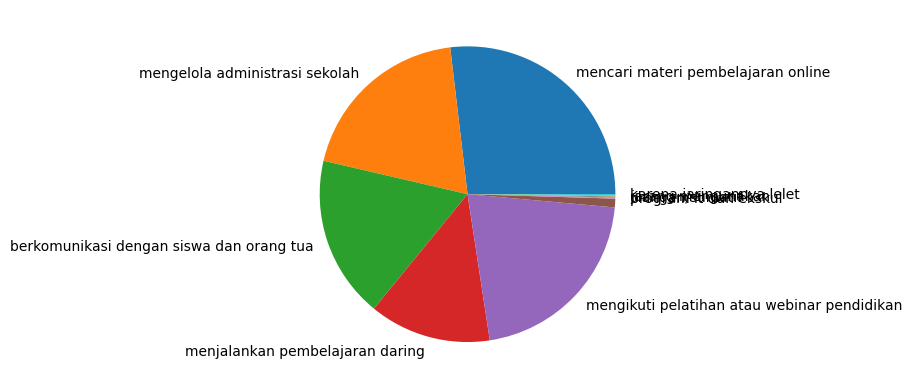

Counter({'mencari materi pembelajaran online': 226, 'mengikuti pelatihan atau webinar pendidikan': 178, 'mengelola administrasi sekolah': 164, 'berkomunikasi dengan siswa dan orang tua': 149, 'menjalankan pembelajaran daring': 112, '': 8, 'program it dan ekskul': 1, 'ulangan/sumatif': 1, 'jarang mengunakan': 1, 'karena jaringannya lelet': 1})


In [144]:
#  'Untuk tujuan apa Anda menggunakan internet di sekolah/lembaga pendidikan? (Pilih semua yang sesuai)': 'UtaAmidspsys',
# Selain BAKTI
ss = dfG3.UtaAmidspsys
S = []
for s in ss:
    sTmp = [t.lower().strip() for t in s.replace("e.g., ", "").split(",")]
    S.extend(sTmp)
s = Counter(S)
plt.pie(s.values(), labels=s.keys())
plt.show()
print(s)
dSum = sum(s.values())

# Kesan : Tidak ada perbedaan signifikan (Trivial karena yang ditanya Guru di Lingkungan Sekolah)

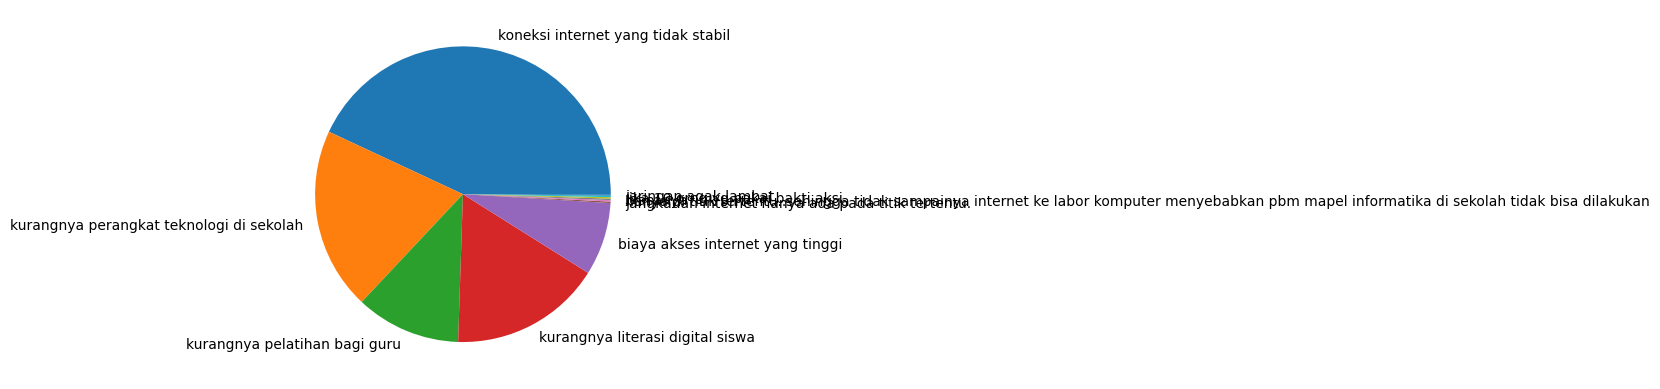

Counter({'koneksi internet yang tidak stabil': 270, 'kurangnya perangkat teknologi di sekolah': 125, 'kurangnya literasi digital siswa': 104, 'kurangnya pelatihan bagi guru': 72, 'biaya akses internet yang tinggi': 50, 'jangkauan internet hanya ada pada titik tertentu.': 1, 'hanya di titik tertentu..sehingga tidak sampainya internet ke labor komputer menyebabkan pbm mapel informatika di sekolah tidak bisa dilakukan': 1, 'biasanya': 1, 'jika 10 orng yg pakai bakti aksi': 1, 'jaringan agak lambat': 1, '': 1})


In [146]:
#  Apa kendala utama yang dihadapi sekolah/lembaga Anda dalam menggunakan internet? (Pilih semua yang sesuai)': 'AkuydsAdmisys',
# Hanya BAKTI
ss = dfG2.AkuydsAdmisys
S = []
for s in ss:
    sTmp = [t.lower().strip() for t in s.replace("e.g., ", "").split(",")]
    S.extend(sTmp)
s = Counter(S)
plt.pie(s.values(), labels=s.keys())
plt.show()
print(s)
dSum = sum(s.values())

# Kesan: Jawaban responden kurang konsisten, karena menjawab menggunakan koneksi BAKTI, tapi mengalami kendala biaya akses internet yang tinggi.

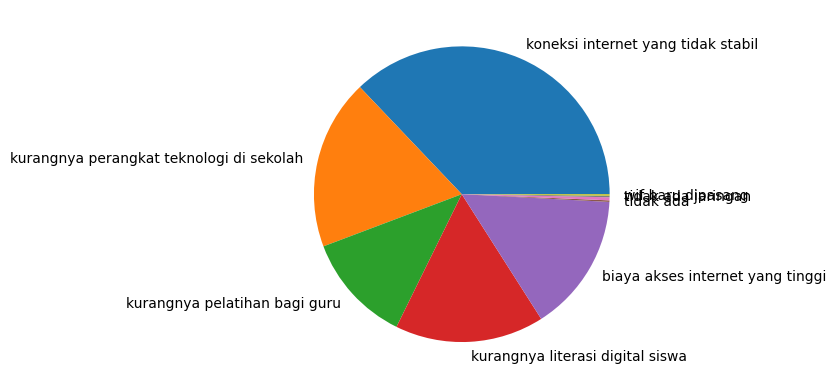

Counter({'koneksi internet yang tidak stabil': 223, 'kurangnya perangkat teknologi di sekolah': 112, 'kurangnya literasi digital siswa': 98, 'biaya akses internet yang tinggi': 91, 'kurangnya pelatihan bagi guru': 72, '': 2, 'tidak ada': 1, 'tidak ada jaringan': 1, 'wif baru dipasang': 1})


In [147]:
#  Apa kendala utama yang dihadapi sekolah/lembaga Anda dalam menggunakan internet? (Pilih semua yang sesuai)': 'AkuydsAdmisys',
# Selain BAKTI
ss = dfG3.AkuydsAdmisys
S = []
for s in ss:
    sTmp = [t.lower().strip() for t in s.replace("e.g., ", "").split(",")]
    S.extend(sTmp)
s = Counter(S)
plt.pie(s.values(), labels=s.keys())
plt.show()
print(s)
dSum = sum(s.values())

# Kesan: Tidak ada perbedaan yang berarti dari pertanyaan ini bagi yang menggunakan dan tidak menggunakan koneksi Bakti. Responden tidak memahami pertanyaan dengan baik?